In [65]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.svm as svm
import prettyplotlib as ppl
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns

from sklearn import linear_model
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [66]:
# Load data
boston = datasets.load_boston()
X, y = shuffle(boston.data, boston.target, random_state=13)
X = X.astype(np.float32)
offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

In [67]:
# Check data
pd.concat([pd.DataFrame(X_train), pd.Series(y_train)], axis=1).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,15.02340,0,18.10,0,0.614,5.304,97.300003,2.1007,24,666,20.200001,349.480011,24.91,12.0
1,5.44114,0,18.10,0,0.713,6.655,98.199997,2.3552,24,666,20.200001,355.290009,17.73,15.2
2,1.00245,0,8.14,0,0.538,6.674,87.300003,4.2390,4,307,21.000000,380.230011,11.98,21.0
3,0.00632,18,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.0
4,0.26169,0,9.90,0,0.544,6.023,90.400002,2.8340,4,304,18.400000,396.299988,11.72,19.4


In [68]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,3.544260,11.774725,11.044518,0.072527,0.553419,6.295651,68.419777,3.824037,9.523077,408.494507,18.446184,357.770813,12.610594
std,8.573827,23.752619,6.860472,0.259645,0.115708,0.711593,28.123917,2.122385,8.687875,168.251573,2.171723,89.000625,7.076902
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.520000,1.730000
25%,0.083390,0.000000,5.130000,0.000000,0.448000,5.888000,44.750000,2.108400,4.000000,279.000000,17.349999,375.424988,6.885000
50%,0.249800,0.000000,8.560000,0.000000,0.538000,6.209000,77.000000,3.182700,5.000000,330.000000,19.000000,391.339996,11.410000
75%,3.621175,17.750000,18.100000,0.000000,0.624000,6.630000,93.950001,5.287300,24.000000,666.000000,20.200001,396.209991,17.025000
max,88.976196,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.899994,37.970001


In [69]:
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 1,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)
clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

MSE: 6.5022


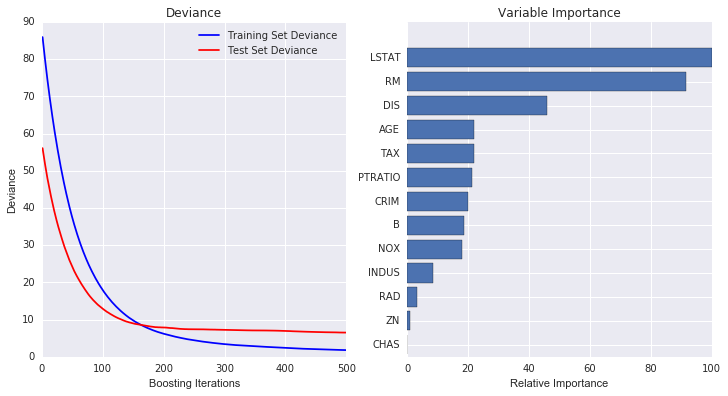

In [70]:
# Plot training deviance
# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [71]:
###############################################################################
# Fit other regressor
# Linear Model
lir = linear_model.LinearRegression()
lir.fit(X_train, y_train)

# Support Vector Machine(Regression)
svr = svm.SVR()
svr.fit(X_train, y_train)

# AdaBoost
abr = ensemble.AdaBoostRegressor()
abr.fit(X_train, y_train)

# Bagging
bgr = ensemble.BaggingRegressor()
bgr.fit(X_train, y_train)

# ExtraTrees
etr = ensemble.ExtraTreesRegressor()
etr.fit(X_train, y_train)

# Random Forest
rfr = ensemble.RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [72]:
lir_mse = mean_squared_error(y_test, lir.predict(X_test))
svr_mse = mean_squared_error(y_test, svr.predict(X_test))
abr_mse = mean_squared_error(y_test, abr.predict(X_test))
bgr_mse = mean_squared_error(y_test, bgr.predict(X_test))
etr_mse = mean_squared_error(y_test, etr.predict(X_test))
rfr_mse = mean_squared_error(y_test, rfr.predict(X_test))
print("MSE: %.4f" % lir_mse)
print("MSE: %.4f" % svr_mse)
print("MSE: %.4f" % abr_mse)
print("MSE: %.4f" % bgr_mse)
print("MSE: %.4f" % etr_mse)
print("MSE: %.4f" % rfr_mse)

MSE: 15.8255
MSE: 53.9938
MSE: 8.9486
MSE: 6.9056
MSE: 10.7871
MSE: 6.0290
